# 추석 명절을 맞이하여 파이썬을 이용하여 보름달 맞이와 함께 매일 변하는 달의 모습을 관측해보겠습니다.

In [2]:
# 달을 관측하기 위하여 moon이라고 하는 패키지를 설치합니다.
%%capture
!pip install moon

**[달맞이 실습 1] 오늘**

{'time': '28 Sep 2023 09:00 UT', 'phase': 98.34, 'age': 13.306, 'diameter': 1990.8, 'distance': 360018, 'j2000': {'ra': 23.4736, 'dec': -6.6481}, 'subsolar': {'lon': 15.765, 'lat': 0.538}, 'subearth': {'lon': 1.336, 'lat': 3.846}, 'posangle': 338.012}
☽ The image will open up in a new window. ☽ 
☽ It might be behind your terminal window. ☽


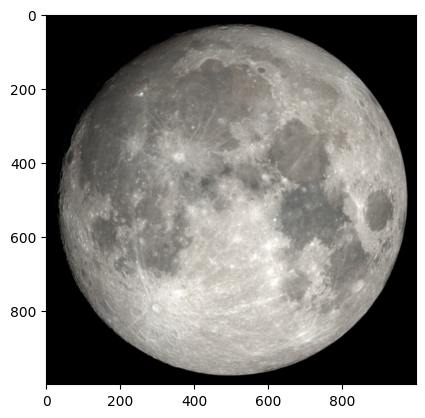

☽ Image closed. ☽


In [15]:
# moon.terminal_ui 모듈에서 TerminalUi 클래스를 가져옵니다.
# TerminalUi 클래스는 달의 위상을 텍스트 기반 UI로 표시하는데 사용됩니다.
from moon.terminal_ui import TerminalUi

# TerminalUi 클래스의 인스턴스를 생성합니다.
# 이 인스턴스를 사용하여 달의 위상 정보를 가져오고 표시할 수 있습니다.
ui = TerminalUi()

# set_moon_phase() 메서드를 호출하여 오늘 날짜의 달의 위상을 설정합니다.
# 이 메서드는 내부적으로 오늘 날짜를 기반으로 달의 위상 정보를 계산하고 저장합니다.
ui.set_moon_phase()  # 오늘 날짜로 설정됩니다.

# moon_datetime_info 속성을 출력하여 달의 위상 정보를 확인합니다.
# 이 속성에는 달의 위상, 날짜, 시간 등의 정보가 포함되어 있습니다.
print(ui.moon_datetime_info)

# show() 메서드를 호출하여 달의 위상을 텍스트 기반 UI로 표시합니다.
# 이 메서드는 달의 현재 위상을 시각적으로 표현하여 출력합니다.
ui.show()


**[달맞이 실습 2] 특정 날짜**

{'time': '13 Sep 2023 09:00 UT', 'phase': 2.72, 'age': 27.973, 'diameter': 1765.0, 'distance': 406077, 'j2000': {'ra': 10.3366, 'dec': 14.8273}, 'subsolar': {'lon': -161.161, 'lat': 0.933}, 'subearth': {'lon': 0.354, 'lat': -5.46}, 'posangle': 20.294}
☽ The image will open up in a new window. ☽ 
☽ It might be behind your terminal window. ☽


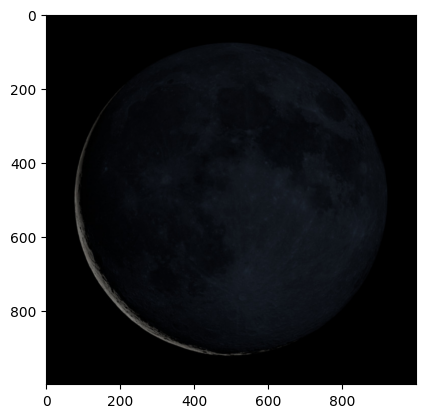

☽ Image closed. ☽


In [16]:
from moon.terminal_ui import TerminalUi
import datetime  # datetime 모듈을 임포트합니다.

ui = TerminalUi()

# set_moon_phase() 메서드를 호출하여 특정 날짜의 달의 위상을 설정합니다.
# datetime.date(year, month, day)를 사용하여 특정 날짜를 생성합니다.
specific_date = datetime.date(2023, 9, 13)  # 예: 2023년 9월 13일

# 날짜 객체를 문자열로 변환합니다.
specific_date_str = specific_date.strftime('%Y-%m-%d')

ui.set_moon_phase(specific_date_str)  # 문자열 형태의 특정 날짜로 설정됩니다.

print(ui.moon_datetime_info)
ui.show()


**[달맞이 실습 3] 1개월 동안의 달의 변화**

In [5]:
%%capture
!pip install tqdm

Fetching moon phases:   0%|          | 0/30 [00:00<?, ?it/s]

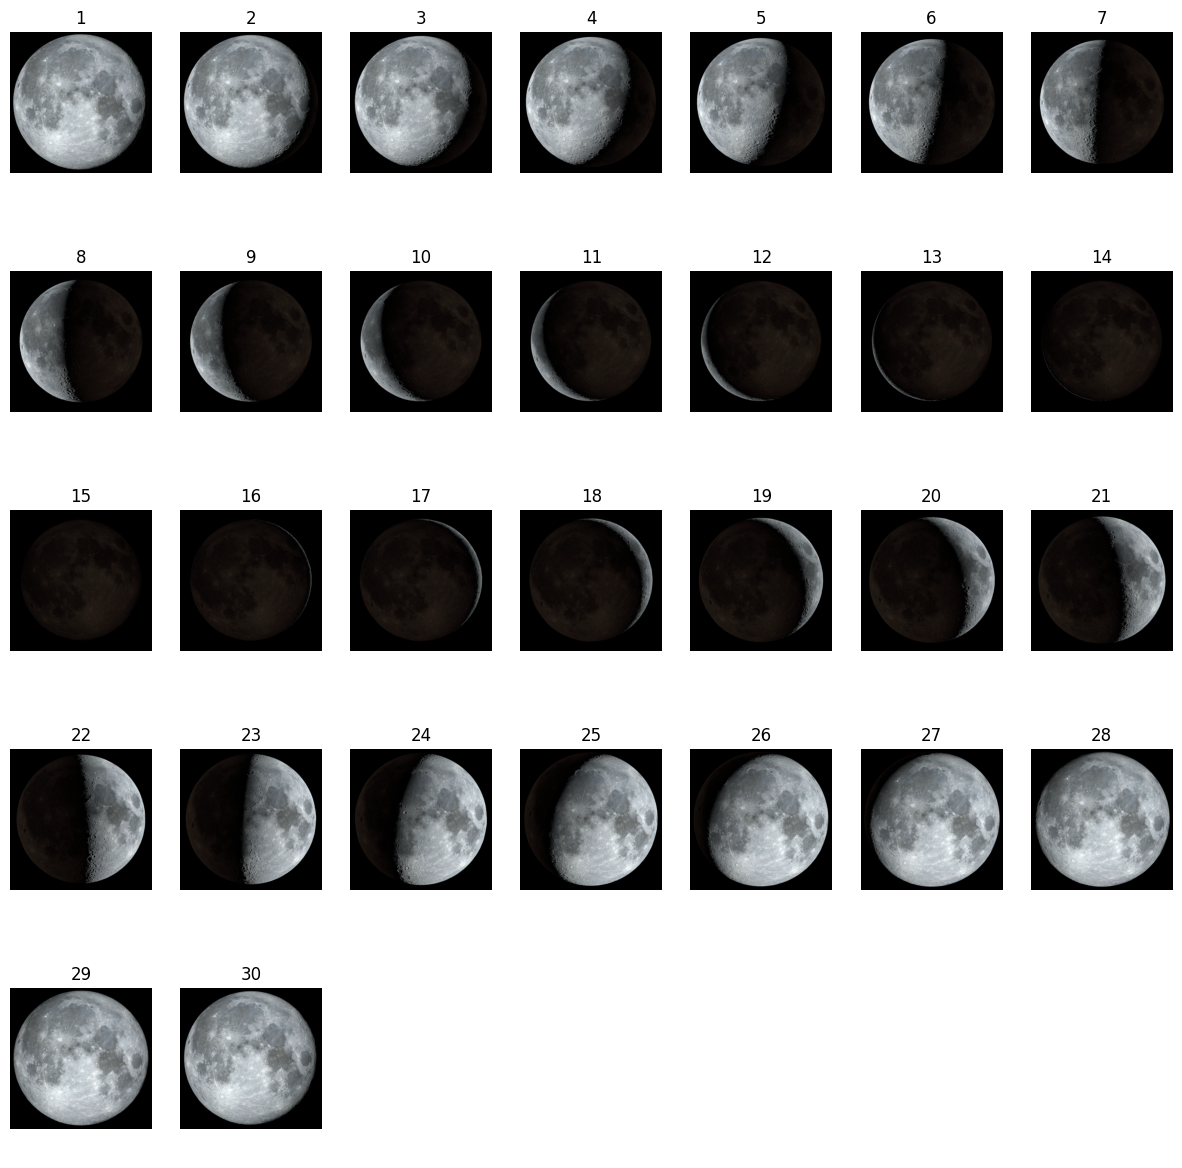

In [14]:
from moon.terminal_ui import TerminalUi
import datetime
import matplotlib.pyplot as plt
import calendar
from tqdm.notebook import tqdm

# 달의 위상을 가져오는 함수
def get_moon_phase_image(date):
    ui = TerminalUi()
    specific_date_str = date.strftime('%Y-%m-%d')
    ui.set_moon_phase(specific_date_str)
    return ui.moon_datetime_info, ui.image

# 2023년 9월의 달의 위상 이미지를 가져옵니다.
year, month = 2023, 9
start_date = datetime.date(year, month, 1)

# 해당 월의 마지막 날짜를 계산합니다.
_, last_day = calendar.monthrange(year, month)
end_date = datetime.date(year, month, last_day)

# 각 날짜의 달의 위상 이미지를 저장합니다.
moon_phases = []
dates = []
for day in tqdm(range((end_date - start_date).days + 1), desc='Fetching moon phases'):
    date = start_date + datetime.timedelta(days=day)
    phase_info, image = get_moon_phase_image(date)
    moon_phases.append(image)
    dates.append(date)

# 달력 형태로 달의 위상 이미지를 표시합니다.
fig, ax = plt.subplots(5, 7, figsize=(15, 15))

for i, axi in enumerate(ax.flat):
    if i < len(moon_phases):
        axi.imshow(moon_phases[i], cmap='gray')
        axi.set_title(dates[i].day)
    axi.axis('off')

plt.show()


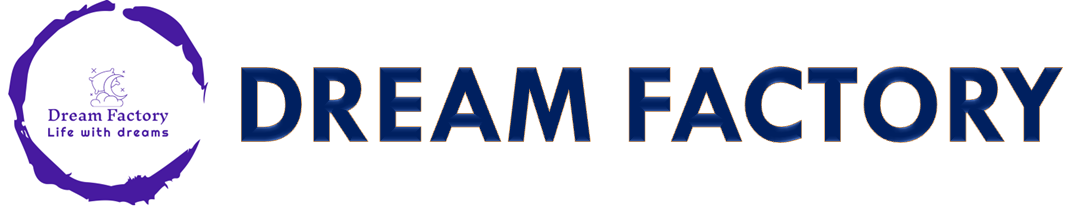